In [65]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [66]:
df = pd.read_csv("../data/clean_data.csv")
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,...,high-performance,diesel,crossover,hybrid,hatchback,flex_fuel,performance,factory_tuner,luxury,exotic
0,other,other,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,1,0,0,0,0,0,1,1,1,0
1,other,other,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,1,0,1,0
2,other,other,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,1,0,0,0,0,0,1,0,1,0
3,other,other,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,1,0,1,0
4,other,other,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,0,0,1,0


In [67]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'vehicle_size', 'vehicle_style', 'highway_mpg',
       'city_mpg', 'popularity', 'msrp', 'high-performance', 'diesel',
       'crossover', 'hybrid', 'hatchback', 'flex_fuel', 'performance',
       'factory_tuner', 'luxury', 'exotic'],
      dtype='object')

In [68]:
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp,high-performance,diesel,crossover,hybrid,hatchback,flex_fuel,performance,factory_tuner,luxury,exotic
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000
mean,2010.384338,245.761121,5.564042,3.436377,26.252560,19.078731,1447.097029,32467.667996,0.116418,0.017291,0.484808,0.029125,0.101393,0.100470,0.293856,0.052124,0.275978,0.042051
std,7.579740,98.894343,1.576064,0.881184,6.274379,4.899649,1157.552327,19772.061391,0.320739,0.130357,0.499790,0.168165,0.301861,0.300638,0.455546,0.222285,0.447024,0.200715
min,1990.000000,55.000000,1.000000,2.000000,12.000000,7.000000,2.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,21000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,225.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,29995.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,42231.250000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,2017.000000,495.000000,9.000000,4.000000,42.000000,31.000000,4199.000000,74078.125000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


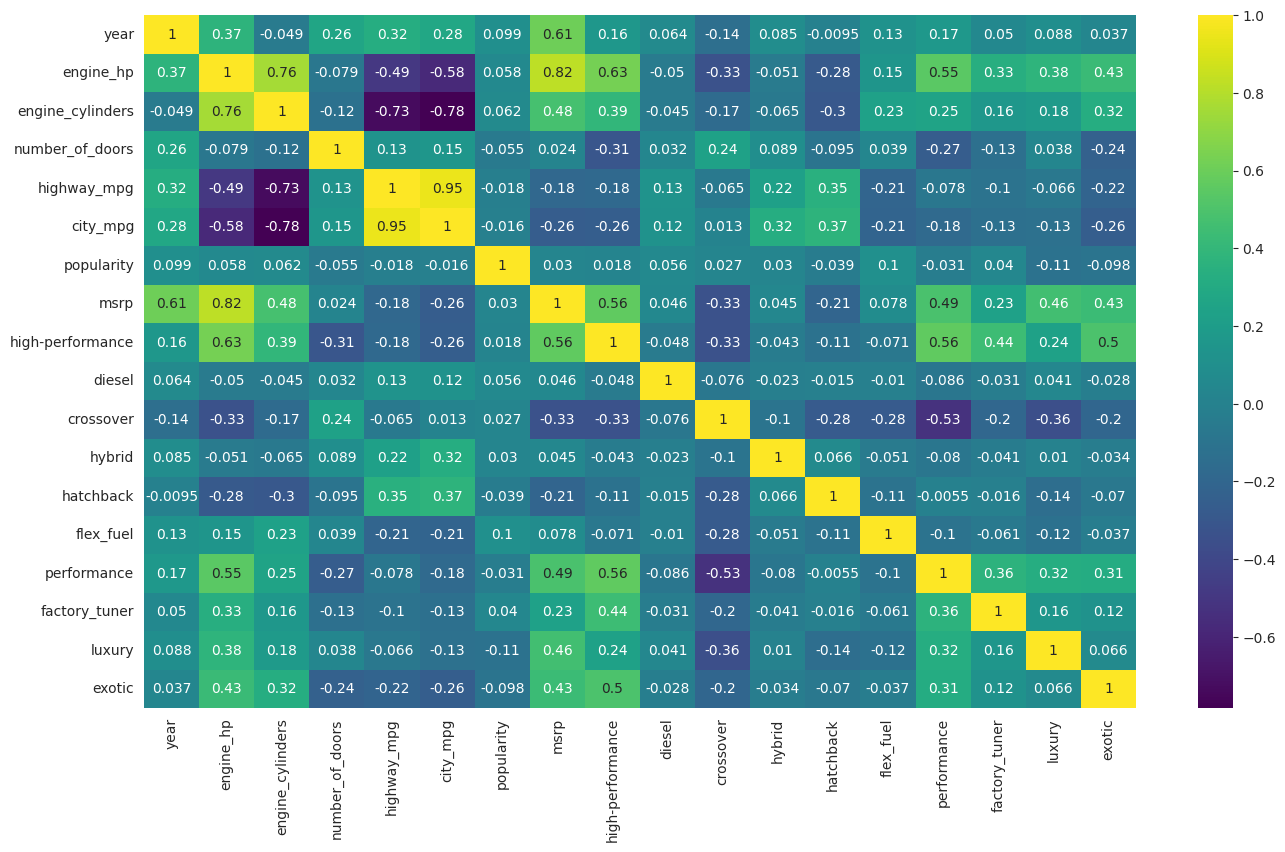

In [69]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="viridis")
plt.show()

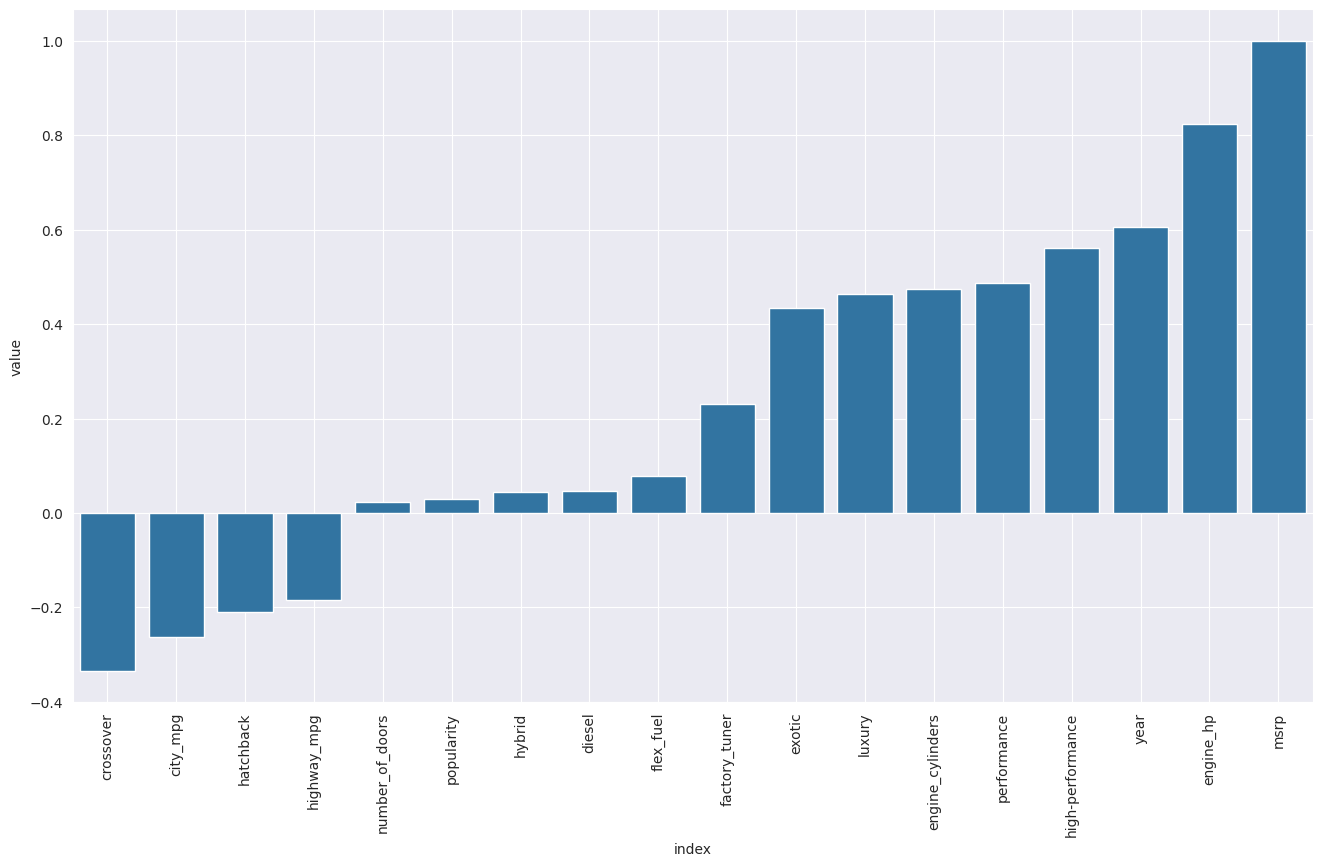

In [70]:
sns.set_style("dark")
cor = df.corrwith(df["msrp"],numeric_only=True).sort_values().reset_index()
cor.columns = ["index","value"]
plt.figure(figsize=(16,9))
sns.barplot(data=cor,x="index",y="value")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [71]:
cat_col = df.select_dtypes("object").columns.tolist()

# split data

In [72]:
x = df.drop(columns="msrp")
y = df["msrp"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=42)
y_train.head(1)

2470    62495.0
Name: msrp, dtype: float64

In [73]:
#x_train[cat_col]  
x_train ["hybrid"].unique()

array([0, 1])

# encoding

In [74]:

oe  = OrdinalEncoder()
oe.fit(x_train[cat_col])
x_train[cat_col] = oe.transform(x_train[cat_col])
x_test[cat_col] = oe.transform(x_test[cat_col])
x_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,...,high-performance,diesel,crossover,hybrid,hatchback,flex_fuel,performance,factory_tuner,luxury,exotic
2470,1.0,9.0,2017,7.0,495.0,8.0,3.0,3.0,2.0,1.0,...,1,0,0,0,0,0,1,1,0,0
10121,9.0,9.0,2011,9.0,148.0,4.0,1.0,2.0,4.0,0.0,...,0,0,1,0,0,0,0,0,0,0
6027,8.0,9.0,2014,7.0,210.0,4.0,3.0,2.0,4.0,2.0,...,0,0,0,0,0,0,1,0,0,0
3949,9.0,9.0,2016,9.0,153.0,4.0,1.0,2.0,4.0,0.0,...,0,0,1,0,0,0,0,0,0,0
7884,9.0,9.0,2015,0.0,240.0,6.0,1.0,0.0,4.0,1.0,...,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,7.0,9.0,2014,9.0,181.0,4.0,1.0,2.0,4.0,2.0,...,0,0,1,0,0,0,0,0,0,0
5191,9.0,9.0,2009,4.0,219.0,6.0,1.0,2.0,4.0,2.0,...,0,0,0,0,0,1,0,0,0,0
5390,8.0,9.0,2016,7.0,220.0,4.0,0.0,2.0,2.0,0.0,...,0,0,0,0,1,0,1,0,0,0
860,9.0,9.0,2009,7.0,260.0,4.0,1.0,2.0,4.0,2.0,...,0,0,0,0,0,0,1,0,1,0


# scaling

In [75]:
sc = MinMaxScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

# modeling

In [76]:
models = {
    "linear":LinearRegression(),
    "ridge" : Ridge(random_state=42),
    "lasso":Lasso(random_state=42),
    "elasticnet":ElasticNet(random_state=42),
    "knn":KNeighborsRegressor(),
    "svr":SVR(),
    "tree":DecisionTreeRegressor(random_state=42),
    "forest" :RandomForestRegressor(random_state=42)
}

In [77]:
def check_models(models):
    for name,c_model in models.items():
        model = c_model
        model.fit(x_train,y_train)
        print(F"model : {name}")
        print(f"Traing score :{model.score(x_train,y_train)}")
        print(f"Testing score :{model.score(x_test,y_test)}")
        print("....................")
#check_models(models)

# model tunning

In [78]:
forest = RandomForestRegressor()

params = [
    {
       "criterion":["squared_error","absolute_error"],
         "max_depth":[None,10,20,30],
            "min_samples_split":[2,5,10],
            "min_samples_leaf":[1,2,4],
            "max_features":["auto","sqrt"],
            "n_estimators":[10,50,100], 
    }
]

grid_search = GridSearchCV(forest,params,scoring="r2",cv=5,n_jobs=-1,verbose=2)
#grid_search.fit(x_train,y_train)
#grid_search.best_params_,grid_search.best_score_

In [79]:
final_model = RandomForestRegressor( 
                                      criterion  = 'squared_error',
                                      max_depth  = None,
                                      max_features  = 'sqrt',
                                      min_samples_leaf  = 1,
                                      min_samples_split  = 5,
                                      n_estimators  = 100,
                                      random_state=42
)
final_model.fit(x_train,y_train)
final_model.score(x_train,y_train),final_model.score(x_test,y_test)

(0.9871295324336302, 0.9752462906248945)

In [80]:
y_pred = final_model.predict(x_test)
r2_score(y_test,y_pred)

0.9752462906248945

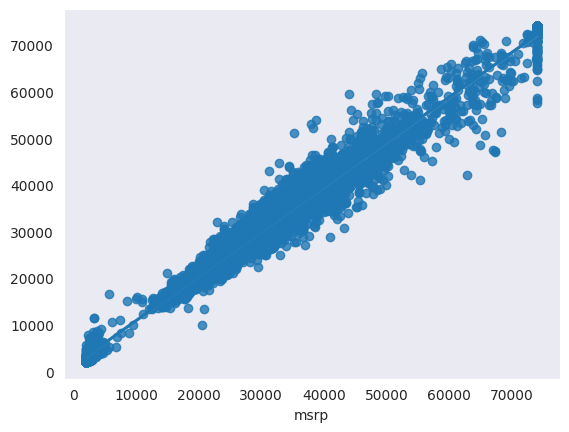

In [81]:
sns.regplot(x=y_test,y=y_pred)
plt.show()

In [82]:
data = [['Dodge' ,'other', 2017, 'premium unleaded (recommended)', 495.0, 8.0,'MANUAL', 'rear wheel drive' ,2.0 ,'Large' ,'Coupe', 21, 13 ,1851 ,1 ,1 ,0 ,0, 0, 0 ,1 ,0 ,0, 0]]

